In [46]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook as tqdm
from sklearn.preprocessing import OneHotEncoder

# Baseline Model: Linear Regression

In [2]:
net_train = pd.read_pickle('../data/net_train.pkl')
net_val = pd.read_pickle('../data/net_val.pkl')
net_test = pd.read_pickle('../data/net_test.pkl')

In [3]:
def feature_eng(df):
#     X_area = pd.get_dummies(df['area_id'], prefix='area', drop_first= True)

    X_day = pd.Series([x.weekday() for x in df.index], name='day')
#     X_day = pd.get_dummies(pd.Series(X_day), prefix='weekday', drop_first=True)

    X_time = pd.Series([x.hour + x.minute/60. for x in df.index], name = 'time')

#     X_time = pd.get_dummies(pd.Series(X_time), prefix='time', drop_first = True)

    X_list = [df[['Temperature', 'area_id', 'Precip', 'AR1', 'AR2', 'AR3']], X_day, X_time]
    [x.reset_index(drop = True, inplace = True) for x in X_list]

    X = pd.concat(X_list, axis = 1)

    y = df['net_inflow']
    return X, y

In [317]:
X_train, y_train = feature_eng(net_train)
X_val, y_val = feature_eng(net_val)
X_test, y_test = feature_eng(net_test)

In [318]:
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=['area_id', 'day'], free_raw_data=False)
lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train, free_raw_data=False)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train, free_raw_data=False)

In [8]:
params = {
 'task': 'train',
 'objective':'regression',
 'metric': 'l1',
 'verbose': 1,
 'max_bin': 256,  # 大会有更准的效果,更慢的速度
 'learning_rate': 0.01,  # 学习率
 'num_leaves': 512,  # 大会更准,但可能过拟合
 'num_iterations': 1000,
 'early_stopping_round': 10,
}

In [80]:
score = np.zeros([7, 7, 7])

In [78]:
num_leaves = [50, 100, 200, 300, 400, 500]
min_data_in_leaf = [5, 10, 20, 30, 40, 50, 60]
max_depth = [5, 7, 10, 15, 20, 50, 75]

In [79]:
param = [((ia, ib, ic), (a, b, c)) for ia, a in enumerate(num_leaves) 
        for ib, b in enumerate(min_data_in_leaf)
        for ic, c in enumerate(max_depth)]

In [303]:
for (ia, ib, ic), (a, b, c) in tqdm(param):
    params = {
     'task': 'train',
     'objective':'regression',
     'metric': 'l2_root',
     'verbose': 0,

     'max_bin': 128,  # 大会有更准的效果,更慢的速度
     'learning_rate': 0.01,  # 学习率
     'num_leaves': a,  # 大会更准,但可能过拟合
     'num_iterations': 1000,
     'early_stopping_round': 5,
     'min_data_in_leaf': b,
     'max_depth': c,
    }
#     print('Running {}-{}-{}, {}/343'.format(ia, ib, ic, (ia)*49 + (ib) * 7 + ic + 1))
    gbm = lgb.train(params,
                    lgb_train, valid_sets = [lgb_eval], verbose_eval = False)
    score[ia, ib, ic] = gbm.best_score['valid_0']['rmse']
#     print('Score is {}'.format(gbm.best_score['valid_0']['l2_root']))

/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/basic.py:1184: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs

/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/basic.py:1184: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs

/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/basic.py:1184: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs

/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/basic.py:1184: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs

/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/basic.py:1184: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs

/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/basic.py:1184: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs

/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/basic.py:1184: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs

/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/basic.py:1184: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs

/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/basic.py:1184: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs

/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/basic.py:1184: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs

/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/basic.py:1184: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs

/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/basic.py:1184: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs

/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/basic.py:1184: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs

/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/basic.py:1184: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs

/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/basic.py:1184: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs

/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/basic.py:1184: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs

/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/basic.py:1184: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs

/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/basic.py:1184: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs

/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/basic.py:1184: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs

/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/basic.py:1184: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs

/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/basic.py:1184: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs

In [304]:
score_new = score[:6, :6, :]

In [305]:
import pickle as pkl
pkl.dump(score_new, open('./score.pkl', 'wb'), pkl.HIGHEST_PROTOCOL)

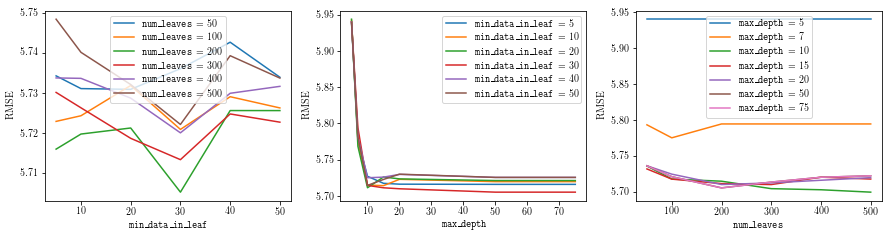

In [307]:
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 3.5))
# Subplot 1
plt.subplot(1, 3, 1)
for ia, a in enumerate(num_leaves):
    plt.plot(min_data_in_leaf, score_new[ia, :,5], label = r'\texttt{num\_leaves} = ' + str(a))
plt.legend()
plt.xlabel(r'\texttt{min\_data\_in\_leaf}')
plt.ylabel('RMSE')

# Subplot 2
plt.subplot(1, 3, 2)
for ia, a in enumerate(min_data_in_leaf):
    plt.plot(max_depth, score_new[2, ia, :], label = r'\texttt{min\_data\_in\_leaf} = ' + str(a))
plt.legend()
plt.xlabel(r'\texttt{max\_depth}')
plt.ylabel('RMSE')

# Subplot 3
plt.subplot(1, 3, 3)
for ia, a in enumerate(max_depth):
    plt.plot(num_leaves, score_new[:, 3, ia], label = r'\texttt{max\_depth} = ' + str(a))
plt.legend()
plt.xlabel(r'\texttt{num\_leaves}')
plt.ylabel('RMSE')
plt.savefig('./hyper.eps')

# plt.xticks(rotation = 45)
# plt.plot(y_val_20.index[:300], (y_val_20 - y_val_hat_20).iloc[:300])
# plt.ylabel('$\hat e_t$')
# plt.xlabel('Date')
# plt.title(u'$\hat e_t$ for Area 20')
# plt.savefig('residual.eps')

# Best model

In [313]:
params = {
     'task': 'train',
     'objective':'regression',
     'metric': 'l2_root',
     'verbose': 0,
     'max_bin': 128,  
     'learning_rate': 0.01,  
     'num_leaves': 200,
     'num_iterations': 1000,
     'early_stopping_round': 5,
     'min_data_in_leaf': 30,
     'max_depth': -1,
    }
#     print('Running {}-{}-{}, {}/343'.format(ia, ib, ic, (ia)*49 + (ib) * 7 + ic + 1))
gbm = lgb.train(params,
                lgb_train, valid_sets = [lgb_eval], verbose_eval = False)

/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/apple/miniconda3/envs/nlpclass/lib/python3.6/site-packages/lightgbm/basic.py:1184: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


In [314]:
gbm.best_score

defaultdict(dict, {'valid_0': {'rmse': 5.705250908904879}})

In [315]:
y_labels = [gbm.feature_name()[i] for i in np.argsort(gbm.feature_importance())]

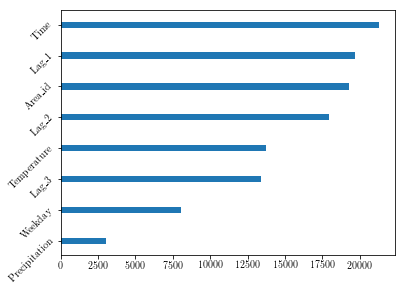

In [316]:
plt.figure(figsize=(6, 4.5))
axes = plt.gca()
axes.set_yticklabels([''] + ['Precipitation', 'Weekday', 'Lag\_3', 'Temperature', 'Lag\_2', 'Area\_id', 'Lag\_1', 'Time'])
plt.yticks(rotation = 45)
plt.barh(range(8), sorted(gbm.feature_importance()),height = 0.2)
plt.savefig('./feat_import.eps')

In [325]:
from sklearn.metrics import mean_squared_error
(mean_squared_error(y_test, gbm.predict(X_test, num_iteration = gbm.best_iteration)))**0.5

5.730709814963972